<br>

## CEIT 418 Data Science Project

As your final data science project for CEIT 418, you will explore an educational dataset, and build a classification machine learning model. As the submission, you should submit in OdtuClass the following items:

1. The url of the Google Colab document, and
2. The PDF version of the complete notebook.

Submissions missing any of the files will not be evaluated.


In the first part, mostly you are expected to explore different tables (possible by using functions such as `head`, `shape`, `info`, and `describe`), deal with duplicate records and missing values, and perform some exploratory tasks.

In the second part, you will build a classification model and report its accuracy.


#### Important Information

For any action you take on the data, you should **explain your rationale** (e.g., I took into account colmuns X and Y when detecting duplicates because Z). Also, you should **provide an explanation/interpretation for outputs** produced by your code (e.g., based on this result, A and B columns can be dropped since they carry mostly missing values).

#### About the Dataset

For the final project, you will work on a public educational dataset shared by UK Open University. Although throughout this document you will be provided with sufficient information about this public dataset, you are strongly recommended to refer to https://analyse.kmi.open.ac.uk/open_dataset for more detailed information.

There is also Kaggle page where you can see some analysis performed shared by other publicly. I think they can be also helpful if you want to explore the dataset beyond this assignment.
https://www.kaggle.com/datasets/rocki37/open-university-learning-analytics-dataset
<br>
<br>

## 1. Exploratory Analysis

### 1.1. Courses Table

Courses table (`courses.csv`) contains the list of all available modules and their presentations.

The columns are:
* **code_module** – code name of the module, which serves as the identifier.
* **code_presentation** – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* **length** - length of the module-presentation in days.

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [ ]:
import numpy as np
import pandas as pd

**TASK1:** Identify and treat duplicate/missing values (if there is any).

In [ ]:
# In this first step I try to read courses.csv file to work on it.
data_courses_csv = pd.read_csv("courses.csv")
data_courses_csv

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
# This show us there is no duplicated values in course.csv dataset
data_courses_csv[data_courses_csv.duplicated()]

,code_module,code_presentation,module_presentation_length


In [ ]:
numberOfDuplicates = data_courses_csv.duplicated().sum()
print("Number of duplicated value:", numberOfDuplicates)

Number of duplicated value: 0


In [ ]:
# This code is used to show whether there are missing values or not.
# isnull(): check the missing values for each column
# .sum(): count the number of missing values for each column
missing_values = data_courses_csv.isnull().sum()
missing_values

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

**TASK2:** Find out how many courses started in February vs October, and compare their length. Interpret the results.

In [ ]:
# Separate B and J presentations
b_presentations = data_courses_csv[data_courses_csv['code_presentation'].str.endswith('B')]
j_presentations = data_courses_csv[data_courses_csv['code_presentation'].str.endswith('J')]

# Count the number of courses starting in February and October
num_b_presentations = len(b_presentations)
num_j_presentations = len(j_presentations)

# Calculate the average length for B and J presentations
avg_length_b = b_presentations['module_presentation_length'].mean()
avg_length_j = j_presentations['module_presentation_length'].mean()

# Display the results
print(f"Number of courses starting in February (B presentations): {num_b_presentations}")
print(f"Number of courses starting in October (J presentations): {num_j_presentations}")
print(f"Average length of courses starting in February: {avg_length_b:.2f} days")
print(f"Average length of courses starting in October: {avg_length_j:.2f} days")


Number of courses starting in February (B presentations): 9
Number of courses starting in October (J presentations): 13
Average length of courses starting in February: 239.89 days
Average length of courses starting in October: 266.38 days


### 1.2. Student Info Table

StudentInfo (`studentInfo.csv`) file contains **demographic** information about the students together with their final result. File contains the following columns:

* **code_module** – an identification code for a module on which the student is registered.
* **code_presentation** - the identification code of the presentation during which the student is registered on the module.
* **id_student** – a unique identification number for the student.
* **gender** – the student’s gender.
* **region** – identifies the geographic region, where the student lived while taking the module-presentation.
* **highest_education** – highest student education level on entry to the module presentation.
* **imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* **age_band** – band of the student’s age.
* **num_of_prev_attempts** – the number times the student has attempted this module.
* **studied_credits** – the total number of credits for the modules the student is currently studying.
* **disability** – indicates whether the student has declared a disability.
* **final_result** – student’s final result in the module-presentation.

**TASK1:** Identify and treat duplicate/missing values (if there is any)

In [ ]:
# We read the dataset to work on it with this code.
student_info_df = pd.read_csv('studentInfo.csv')

In [ ]:
# This code is used to identify duplicate rows.
duplicate_rows = student_info_df[student_info_df.duplicated()]

# Display duplicate rows: Here we had an empty data frame because there is no duplicated value in main data frame.
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result


In [ ]:
# Here, we use isnull() and sum() to check whether there are missing values or not.
# This code will display the number of missing values for each column.
student_info_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [ ]:
# After checking the number of missing values, I used .shape to see the number of columns and rows in dataset.
student_info_df.shape

(32593, 12)

In [ ]:
# There are too many student data in this dataset, so I decided to drop the rows with missing values.
# In this code, I used dropna() to drop the missing values in student_info_df.
student_info_df = student_info_df.dropna()

In [ ]:
# After dropping the missing values I want to check the number of missing values again.
# To see the previous code work or not
student_info_df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [ ]:
# As you see the output of previous code, imd_band became zero after dropping the missing values.
# In addition to that, I want to see the number of rows and columns again in my dataset. I used shape again.
student_info_df.shape

(31482, 12)

**TASK2:** Treating categorical variables.

For this table, besides fixing any potential issue about duplicate/missing values, you are expected to explore the categorical variables: such as `highest_education`, `imd_band`, and `age_band`.

In particular, you may want to check if some categories of `highest_education`, `imd_band`, `age_band` variables (e.g., *Post Graduate Qualification* in `highest_education`) contain few instances. In such cases, you may need to merge the minority categories with a major category and even dedice to create a new set of (fewer) categories based on the existing ones. In some cases, you may even want to decide the reduce the number of categories (if you think they are many).

As long as you provide the rationale, you can decide such details by yourself. You should work on AT LEAST TWO categorical variables in this task.

In [ ]:
#I looked ate the value counts of the highest_education in this code
student_info_df['highest_education'].value_counts()

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

In [ ]:
student_info_df['highest_education'] = student_info_df['highest_education'].replace(['No Formal quals', 'Post Graduate Qualification'], 'Other')

In [ ]:
student_info_df['highest_education'].value_counts()

A Level or Equivalent    13762
Lower Than A Level       12762
HE Qualification          4444
Other                      514
Name: highest_education, dtype: int64

In [ ]:
student_info_df['imd_band'].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

In [ ]:
student_info_df['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [ ]:
imd_band_mapping = {
    '0-10%': 'Low',
    '10-20': 'Low',
    '20-30%': 'Medium',
    '30-40%': 'Medium',
    '40-50%': 'Medium',
    '50-60%': 'Medium',
    '60-70%': 'High',
    '70-80%': 'High',
    '80-90%': 'High',
    '90-100%': 'High'
}

In [ ]:
student_info_df['imd_band'] = student_info_df['imd_band'].map(imd_band_mapping)

In [ ]:
student_info_df['imd_band'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [ ]:
student_info_df['imd_band'].value_counts()

Medium    13573
High      11082
Low        6827
Name: imd_band, dtype: int64

In [ ]:
student_info_df['age_band'].value_counts()

0-35     22272
35-55     9009
55<=       201
Name: age_band, dtype: int64

In [ ]:
student_info_df['age_band'] = student_info_df['age_band'].replace(['35-55', '55<='], '35-55+')

In [ ]:
student_info_df['age_band'].value_counts()

0-35      22272
35-55+     9210
Name: age_band, dtype: int64

**TASK3:** Demographic Information and Performance Levels

More importantly for this table you are expected to explore various relationships between `final_result` and **at least three** categorical variable (e.g., did students with HE qualification perform better, did students with low `imd_band` withdraw more often, or did geographic region play any role? etc.). For this purpose you can visualize data and compute some basic statistics.

You must use at least two different chart types (e.g., bar or line or pie) to illustrate how the success/failure rates differ between different categories (e.g., education level, regions, imd_band, age, etc.). At least in one case, the chart should also denote the gender to illustrate the possible interaction between gender and the other categorical variable (e.g., do european females perform better than asian males -just an example :)).   


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

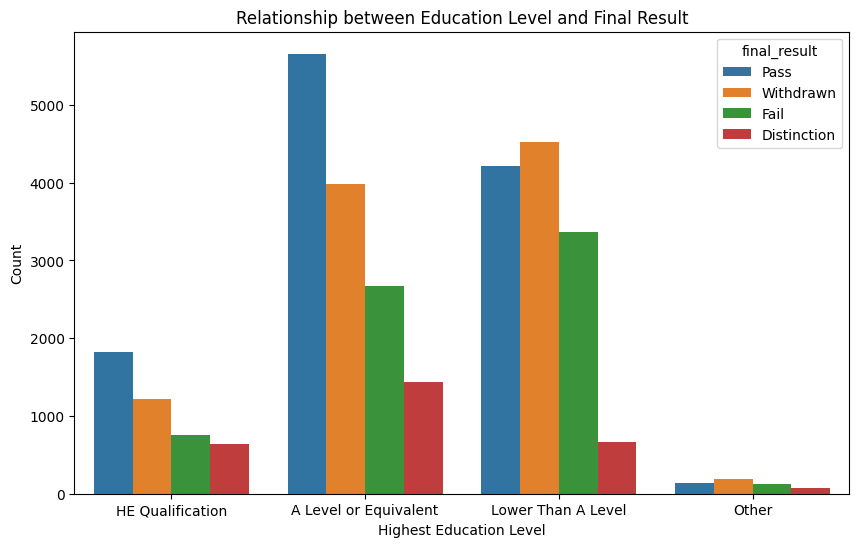

In [ ]:
# Relationship between 'final_result' and 'highest_education'
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_education', hue='final_result', data=student_info_df)
plt.title('Relationship between Education Level and Final Result')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.show()

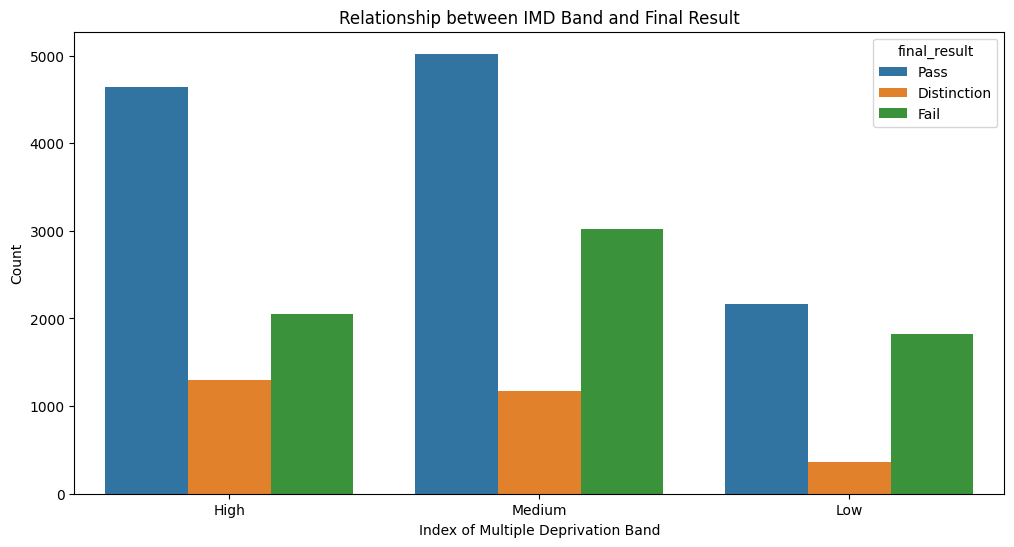

In [ ]:
# Relationship between 'final_result' and 'imd_band' with gender distinction
plt.figure(figsize=(12, 6))
sns.countplot(x='imd_band', hue='final_result', data=student_info_df, hue_order=['Pass', 'Distinction', 'Fail'])
plt.title('Relationship between IMD Band and Final Result')
plt.xlabel('Index of Multiple Deprivation Band')
plt.ylabel('Count')
plt.show()

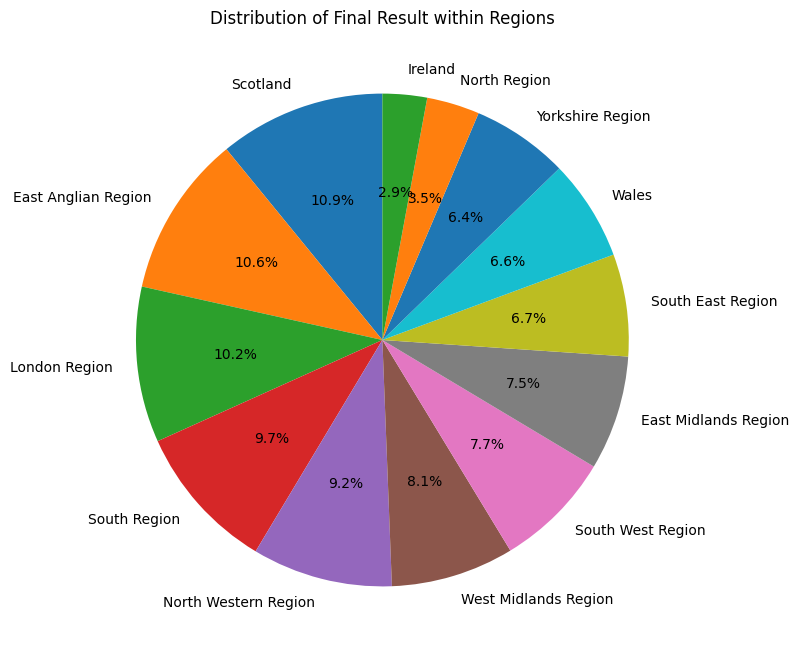

In [ ]:
# Pie chart: Distribution of 'final_result' within 'region'
region_counts = student_info_df['region'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Final Result within Regions')
plt.show()

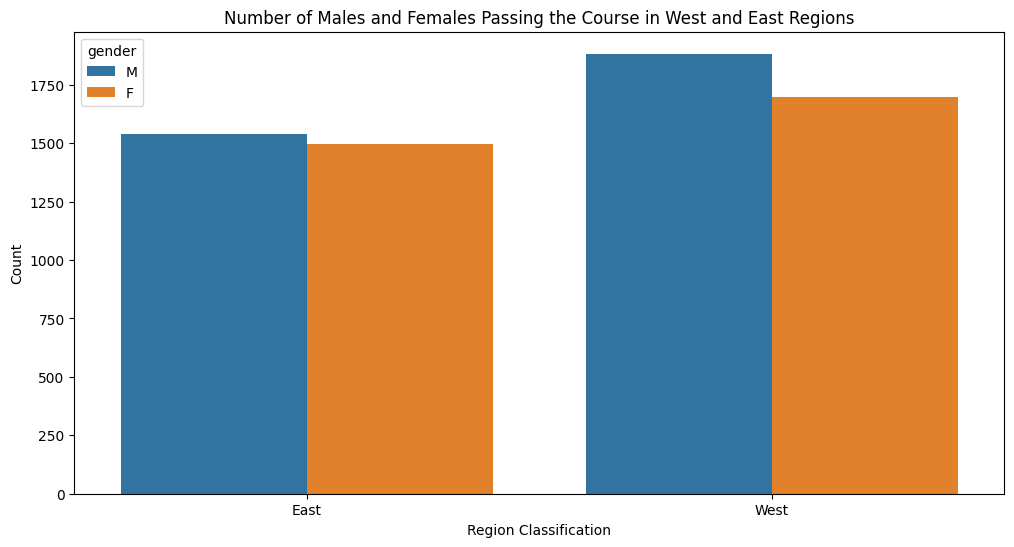

In [ ]:
'''
Classification of regions as "West" or "East".
The regions below are the regions that are placed west and east of the UK
Since it is not possible to say that the other regions are in the west and east, I described them as others.
'''
west_regions = ['North Western Region', 'West Midlands Region', 'South West Region', 'Wales']
east_regions = ['East Anglian Region', 'East Midlands Region', 'South East Region']

# Create a new column 'region_classification' based on the classification
#
student_info_df['region_classification'] = 'Other'
student_info_df.loc[student_info_df['region'].isin(west_regions), 'region_classification'] = 'West'
student_info_df.loc[student_info_df['region'].isin(east_regions), 'region_classification'] = 'East'

# Filter data for passed courses and specified regions
passed_courses_df = student_info_df[(student_info_df['final_result'] == 'Pass') &
                                    (student_info_df['region_classification'].isin(['West', 'East']))]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='region_classification', hue='gender', data=passed_courses_df)
plt.title('Number of Males and Females Passing the Course in West and East Regions')
plt.xlabel('Region Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
# Step 2: Compute Basic Statistics

# Group by 'final_result' and compute statistics for 'studied_credits'
statistics_by_result = student_info_df.groupby('final_result')['studied_credits'].describe()
print("Basic Statistics for Studied Credits by Final Result:")
statistics_by_result

Basic Statistics for Studied Credits by Final Result:


,count,mean,std,min,25%,50%,75%,max
final_result,,,,,,,,
Distinction,2825.0,71.430088,34.520042,30.0,60.0,60.0,90.0,330.0
Fail,6907.0,76.094542,38.822398,30.0,60.0,60.0,90.0,360.0
Pass,11830.0,74.126796,36.185267,30.0,60.0,60.0,90.0,630.0
Withdrawn,9920.0,91.426915,46.848968,30.0,60.0,60.0,120.0,655.0


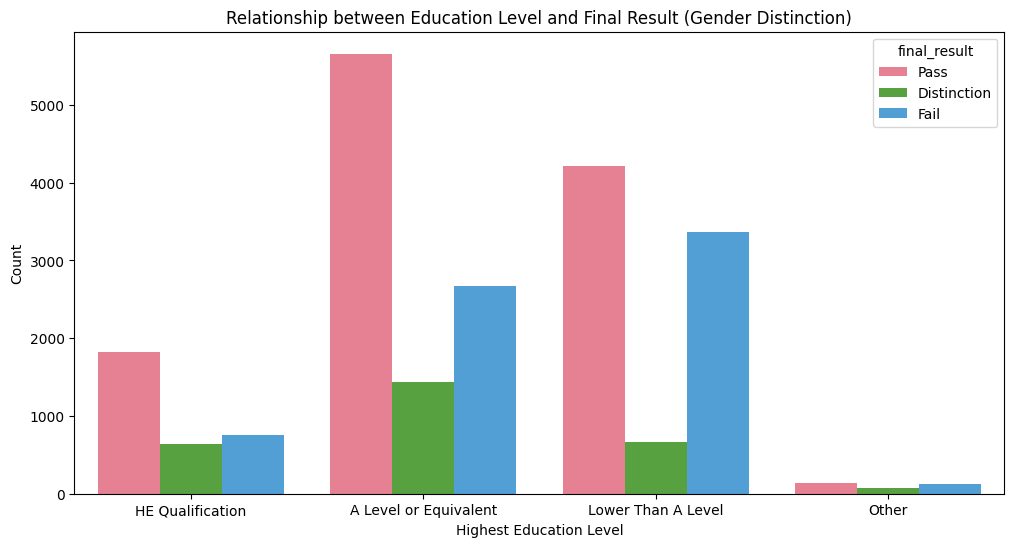

In [ ]:
# Relationship between 'final_result' and 'highest_education' with gender distinction
plt.figure(figsize=(12, 6))
sns.countplot(x='highest_education', hue='final_result', data=student_info_df, hue_order=['Pass', 'Distinction', 'Fail'], palette='husl', dodge=True)
plt.title('Relationship between Education Level and Final Result (Gender Distinction)')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.show()

### 1.3. Registration Table

Registration table (`studentRegistration.csv`) contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the presentation.
* **id_student** – a unique identification number for the student.
* **date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* **date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have *Withdrawal* as the value of the `final_result` column in the `studentInfo.csv` file.

**TASK1:** As the first task, you need to ensure that there are no conflicts between `studentRegistration.csv` and `studentInfo.csv` dataset in terms of **Withdrawal** status of *unregistered* students. For example, if a student unregistered from a course at some point (which can be found in "studentRegistration.csv"), his/her `final_result` should be **Withdrawal**.

In [ ]:
(student_info_df['final_result'] == 'Withdrawn').sum()

9920

In [ ]:
registration_df = pd.read_csv('studentRegistration.csv')

In [ ]:
unregistered_students = registration_df[registration_df['date_unregistration'].notna()]['id_student'].unique()
unregistered_students

array([  30268,   65002,   94961, ..., 2357806, 2608143, 2679821])

In [ ]:
# Verify and update Withdrawal status in studentInfo.csv
for student_id in unregistered_students:
    # Check the corresponding entry in studentInfo.csv
    info_entry_index = student_info_df.index[student_info_df['id_student'] == student_id]

    # Verify Withdrawal status
    if not info_entry_index.empty and student_info_df.loc[info_entry_index, 'final_result'].iloc[0] != 'Withdrawn':
        # Update final_result to Withdrawal
        student_info_df.loc[info_entry_index, 'final_result'] = 'Withdrawal'


print("Update complete.")


Update complete.


In [ ]:
(student_info_df['final_result'] == 'Withdrawn').sum()

9804

**TASK2:** Categorize students based on the day they registered for a course. In other words, you need to **bin** the registration data based on the `date_registration` column. Just to illustrate this idea, you can group students into categories such as "Very early birds", "early birds", "in-time", and "late-comers". You can use the categories given in this example or create your own categories.

In [ ]:
# Define bin edges and labels
bin_edges = [-float('inf'), -15, -5, 5, float('inf')]  # Adjust these as needed
bin_labels = ['Very early birds', 'Early birds', 'In-time', 'Late-comers']

# Create a new column 'registration_category' based on the binning
registration_df['registration_category'] = pd.cut(registration_df['date_registration'], bins=bin_edges, labels=bin_labels)

# Print the counts for each category
category_counts = registration_df['registration_category'].value_counts().sort_index()
print("Registration Categories:")
print(category_counts)

Registration Categories:
Very early birds    31031
Early birds          1025
In-time               389
Late-comers           103
Name: registration_category, dtype: int64


**TASK3:** Categorize students based on the day they *unregistered* a course. In other words, you need to **bin** registration date based on the `date_unregistration` column. You are free to determine the number and the name of the categories (as in Task1).

In [ ]:
# Define bin edges and labels for unregistration date
unregistration_bin_edges = [-float('inf'), -15, -5, 5, float('inf')]  # Adjust these as needed
unregistration_bin_labels = ['Very early unregistration', 'Early unregistration', 'In-time unregistration', 'Late unregistration']

# Create a new column 'unregistration_category' based on the binning
registration_df['unregistration_category'] = pd.cut(registration_df['date_unregistration'], bins=unregistration_bin_edges, labels=unregistration_bin_labels)

# Print the counts for each unregistration category
unregistration_category_counts = registration_df['unregistration_category'].value_counts().sort_index()
print("Unregistration Categories:")
print(unregistration_category_counts)

Unregistration Categories:
Very early unregistration    1723
Early unregistration          570
In-time unregistration       1052
Late unregistration          6727
Name: unregistration_category, dtype: int64


**TASK4:** Choose *THREE variables* from demographic data (`studentInfo.csv`), and explore if there is some relationship between students' registration/unregistration behaviour and the chosen demographic variables (e.g., did students from HE registered early? did male students unregistered sooner than female students?). You are free in exploring the data to answer similar questions that you determine. If you find no relationship, this is totally fine. Just remember that your analysis should be accompanied with meaningful interpretations.

In [ ]:
# Choose three demographic variables
chosen_variables = ['highest_education', 'gender', 'imd_band']

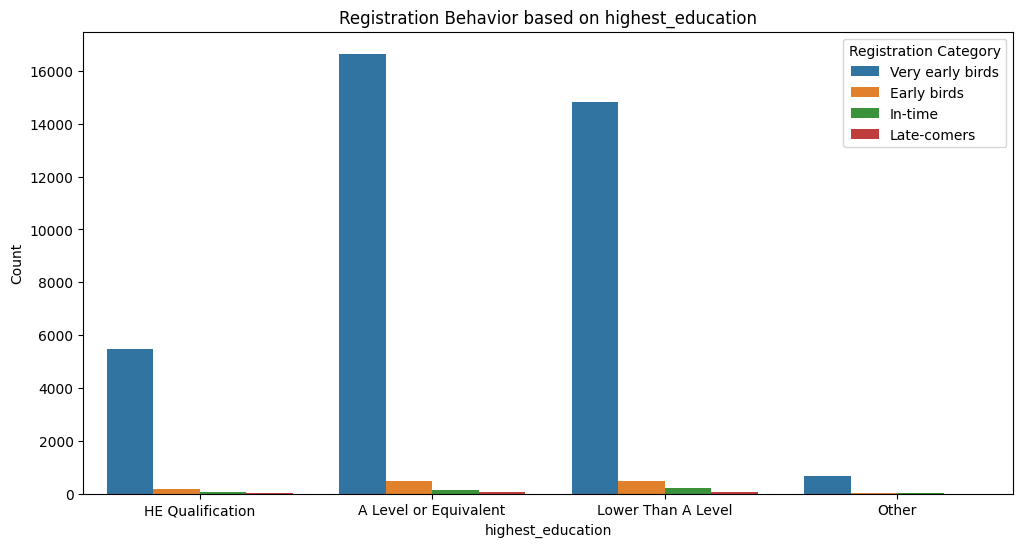

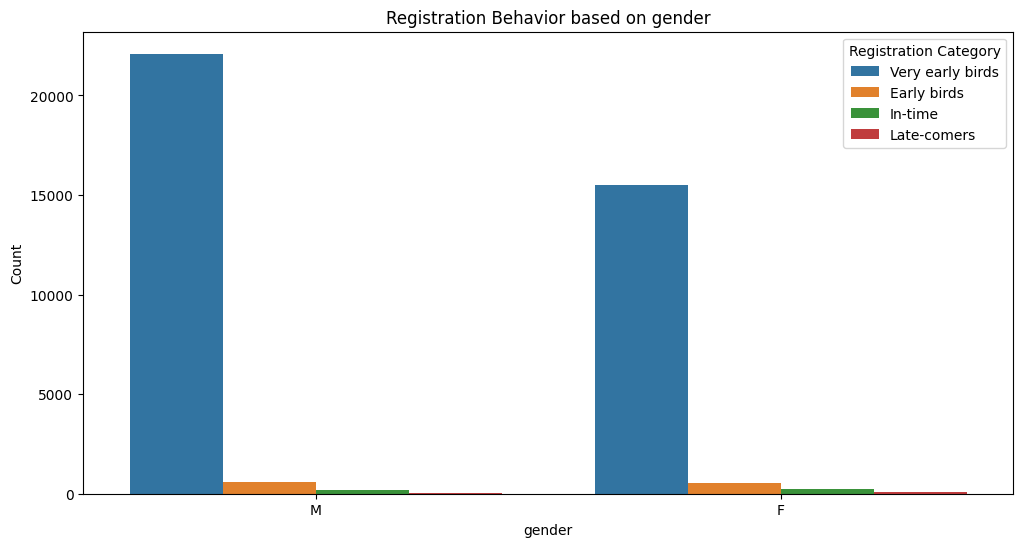

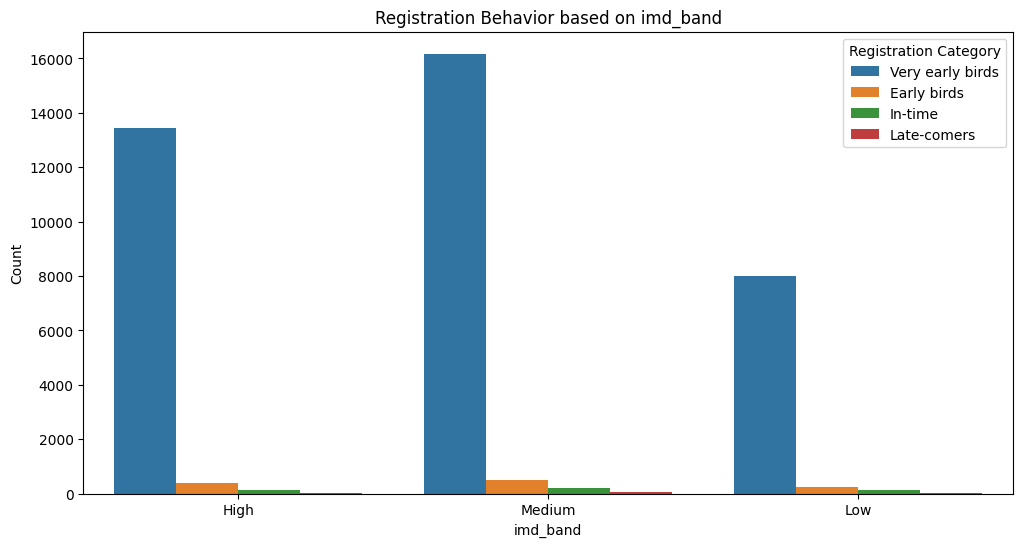

In [ ]:
# Explore registration behavior based on chosen variables
for variable in chosen_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=variable, hue='registration_category', data=pd.merge(student_info_df, registration_df, on='id_student', how='left'))
    plt.title(f'Registration Behavior based on {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Registration Category')
    plt.show()

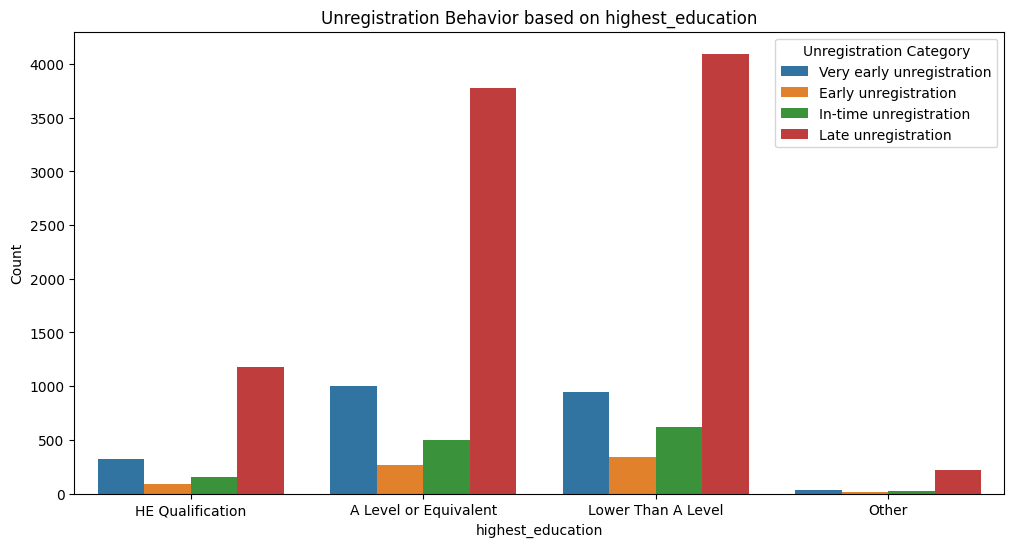

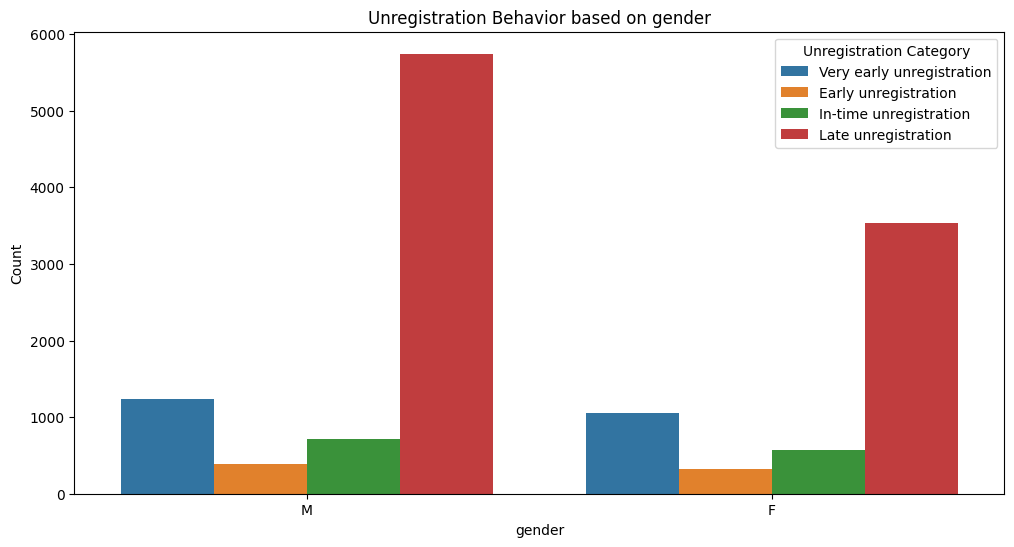

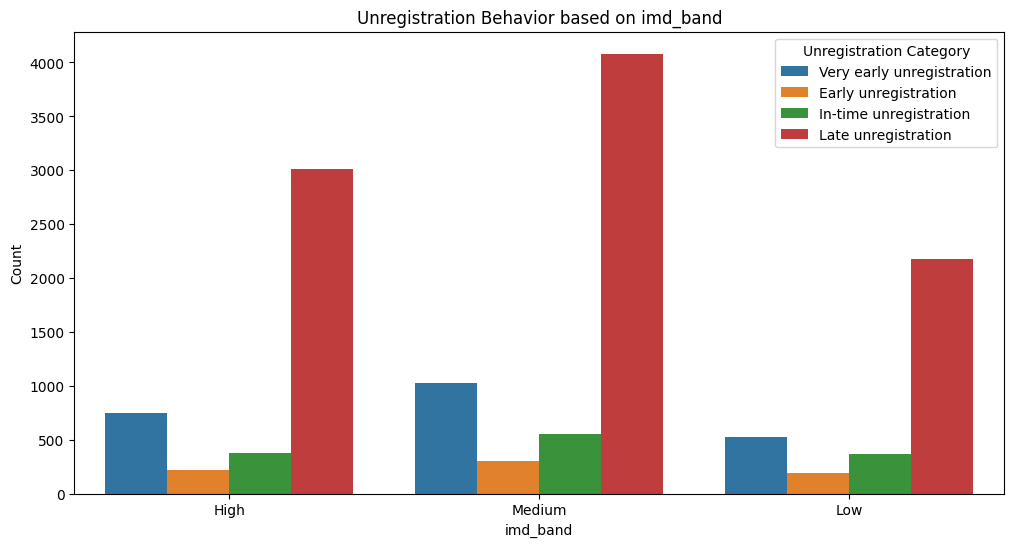

In [ ]:
# Explore unregistration behavior based on chosen variables
for variable in chosen_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=variable, hue='unregistration_category', data=pd.merge(student_info_df, registration_df, on='id_student', how='left'))
    plt.title(f'Unregistration Behavior based on {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Unregistration Category')
    plt.show()

### 1.4. Course Components Table

Course components table (`moodle.csv`) contains information about the available materials in the Moodle LMS. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The `moodle.csv` file contains the following columns:

* **id_site** – an identification number of the material.
* **code_module** – an identification code for module.
* **code_presentation** - the identification code of presentation.
* **activity_type** – the role associated with the module material.
* **week_from** – the week from which the material is planned to be used.
* **week_to** – week until which the material is planned to be used.

**TASK1:** In this dataset, some columns contain mainly missing values. Detect them and drop them to save space in the memory.

In [ ]:
moodle_df = pd.read_csv('moodle.csv')

In [ ]:
moodle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
# Set a threshold for missing values (e.g., 90%)
threshold = 0.8

# Identify columns with mainly missing values
missing_columns = moodle_df.columns[moodle_df.isnull().mean() > threshold]

In [ ]:
missing_columns

Index(['week_from', 'week_to'], dtype='object')

In [ ]:
moodle_df = moodle_df.drop(columns=missing_columns)

In [ ]:
moodle_df.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


**TASK2:** First identify the top 5 popular course component (`activity_type`) across all courses. Then, create a new table that displays how many times each of these popular components were included in each offering (`code_presentation`) of each course (`code_module`). Briefly interpret this table.

In [ ]:
top_components = moodle_df['activity_type'].value_counts().nlargest(5).index
top_components

Index(['resource', 'subpage', 'oucontent', 'url', 'forumng'], dtype='object')

In [ ]:
# Filter moodle_data for top 5 popular components
popular_components_data = moodle_df[moodle_df['activity_type'].isin(top_components)]

In [ ]:
# Group by code_module, code_presentation, and activity_type and count occurrences
popular_components_table = popular_components_data.groupby(['code_module', 'code_presentation', 'activity_type']).size().unstack(fill_value=0)

In [ ]:
popular_components_table

activity_type                  forumng  oucontent  resource  subpage  url
code_module code_presentation                                            
AAA         2013J                   15         68        95        6   18
            2014J                    6         68        93        6   20
BBB         2013B                   17          1       236       37   15
            2013J                   19          3       236       38   15
            2014B                   17          3       231       37   14
            2014J                    3         70       104       10    6
CCC         2014B                    9         47        78       28   13
            2014J                    9         58        85       31   19
DDD         2013B                   11          6       182      114   92
            2013J                   16         13       178      194   44
            2014B                   13         13       177      193   41
            2014J                   13         13       169      110   46
EEE         2013J                    5         48        34        7    7
            2014B                    5         46        32        7    7
            2014J                    5         45        37        7    7
FFF         2013B                    5        108       129       55  125
            2013J                    7        107       136       55  132
            2014B                    6        101       109       53  133
            2014J                    7        103        80       52  132
GGG         2013J                    2         24        95        5    0
            2014B                    2         25        81        5    0
            2014J                    2         26        63        5    0

### 1.5. Student Activity Data

Student activity data (`studentMoodleInteract.csv`) contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the module presentation.
* **id_student** – a unique identification number for the student.
* **id_site** - an identification number for the course material/component.
* **date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* **sum_click** – the number of times a student interacts with the material in that day.

**TASK1:** Display the total number of clicks for each course per each semester delivered. Besides a textual output, some visualizations must be provided for helping to interpret the data.

<ipython-input-135-ded50623fea8>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)


Total Number of Clicks for Each Course per Semester:
   code_module semester  sum_click
0          AAA        J    1246652
1          BBB        B    2181776
2          BBB        J    3052400
3          CCC        B    1889177
4          CCC        J    2792972
5          DDD        B    2335124
6          DDD        J    3194965
7          EEE        B     832038
8          EEE        J    3152189
9          FFF        B    7195674
10         FFF        J   10398248
11         GGG        B     425165
12         GGG        J     908719


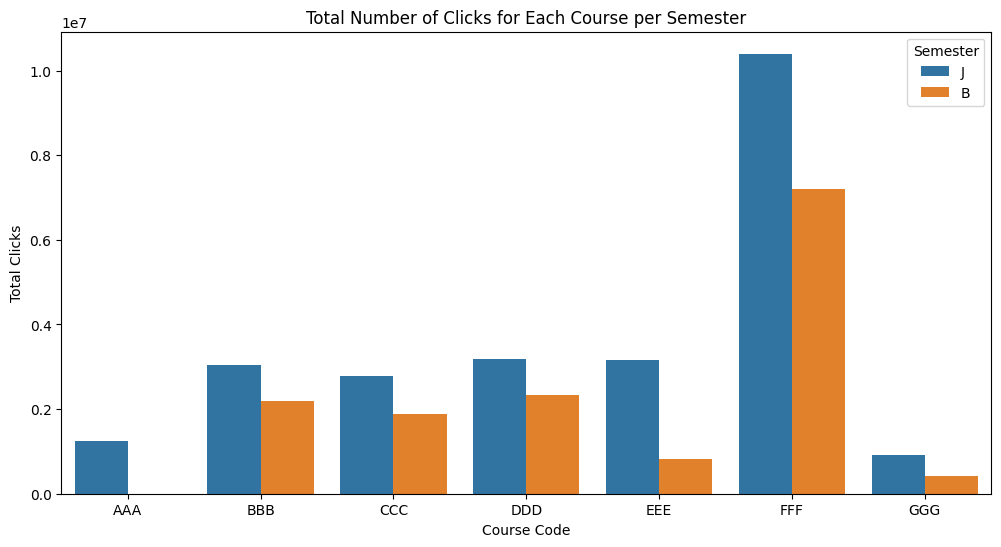

In [ ]:
# Load the dataset with error handling
interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)

# Extract semester information from the code_presentation column
interact_df['semester'] = interact_df['code_presentation'].apply(lambda x: x[-1])

# Group by course, semester, and calculate the total number of clicks
clicks_per_course_semester = interact_df.groupby(['code_module', 'semester'])['sum_click'].sum().reset_index()

# Textual output
print("Total Number of Clicks for Each Course per Semester:")
print(clicks_per_course_semester)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='code_module', y='sum_click', hue='semester', data=clicks_per_course_semester)
plt.title('Total Number of Clicks for Each Course per Semester')
plt.xlabel('Course Code')
plt.ylabel('Total Clicks')
plt.legend(title='Semester')
plt.show()



**TASK2**: As a follow up to the first task, identify the courses in which the total number of clicks is higher in 2014 than 2013. If the course was taught two times in the same year (such as, 2013B and 2013J) use the average of both semesters (`(2013B+2013J)/2`) to compare with the other year.

In [ ]:
import pandas as pd

# Load the dataset
interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)

# Extract year information from the code_presentation column
interact_df['year'] = interact_df['code_presentation'].apply(lambda x: int(x[:4]))

# Group by course, year, and calculate the total number of clicks
clicks_per_course_year = interact_df.groupby(['code_module', 'year'])['sum_click'].sum().reset_index()

# Calculate the average clicks for courses taught in both semesters of a year
clicks_per_course_year['average_clicks'] = clicks_per_course_year.groupby(['code_module', 'year'])['sum_click'].transform('mean')

# Pivot the table to have years as columns
clicks_pivot = clicks_per_course_year.pivot(index='code_module', columns='year', values='average_clicks').reset_index()

# Identify courses where the total number of clicks is higher in 2014 than in 2013
higher_clicks_2014 = clicks_pivot[clicks_pivot[2014] > clicks_pivot[2013]]

# Display the result
print("Courses with Higher Clicks in 2014 compared to 2013:")
print(higher_clicks_2014[['code_module', 2013, 2014]])


<ipython-input-137-743a8ce71e7b>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)


Courses with Higher Clicks in 2014 compared to 2013:
year code_module       2013       2014
4            EEE  1535953.0  2448274.0
6            GGG   509091.0   824793.0


**TASK3:** Which type of resources were mostly clicked by the students? Do you observe a common pattern accross courses (e.g., in almost all courses, clicks on `resource` is  higher than `quiz`)? A heatmap as a visualization might be helpful here.

<ipython-input-138-9fdea6248781>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)


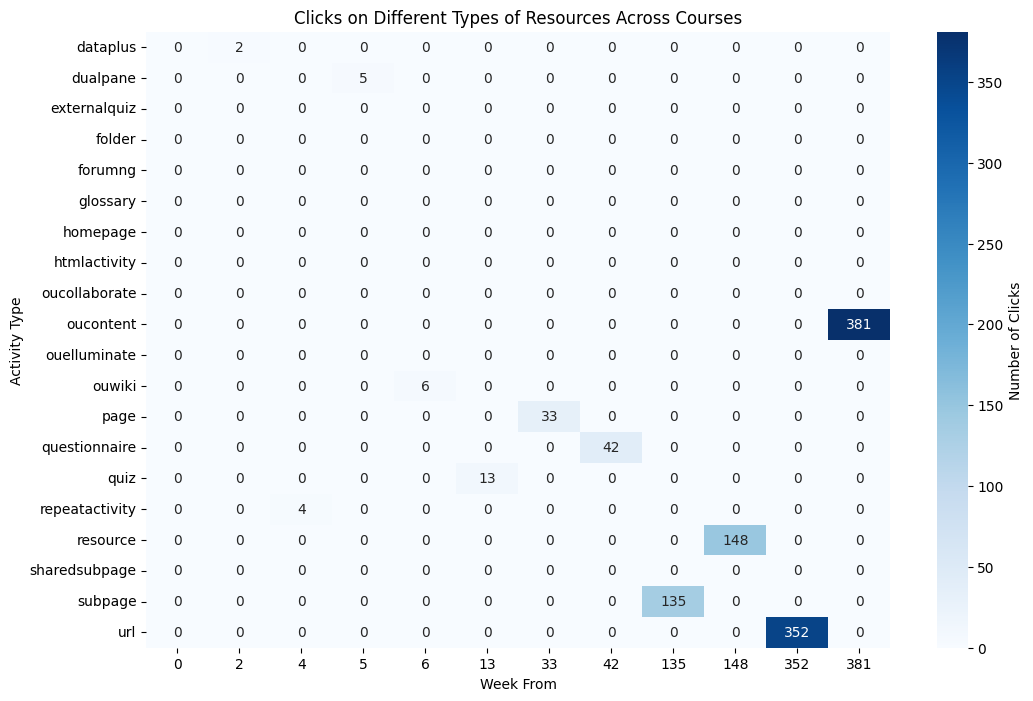

In [ ]:

# Load the dataset
moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)

# Group by activity type and calculate the total number of clicks
clicks_by_activity_type = moodle_df.groupby('activity_type')['week_from'].count().reset_index()

# Pivot the table for visualization
heatmap_data = clicks_by_activity_type.pivot(index='activity_type', columns='week_from', values='week_from').fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Clicks'})
plt.title('Clicks on Different Types of Resources Across Courses')
plt.xlabel('Week From')
plt.ylabel('Activity Type')
plt.show()


**TASK4:** For each student, compute the total number of clicks per each course component type (`activity_type` column in `moodle.csv`) separately for each course and semester. A simple representation of the expected table is provided below with fake data (note that in the given example columns and rows are incomplete).

| Student Id | code_module | code_presentation | PDF | Assignment
| --- | --- | --- | --- | --- |
| 1234 | AAA | 2013J | 23 | 33 |
| 1234 | BBB | 2014B | 5 | 42 |
   
Note that, in this task you actually create some features that can be used for predictive modeling.

In [ ]:
import pandas as pd

# Load the datasets
moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)
interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)

# Merge the datasets based on id_site
merged_df = interact_df.merge(moodle_df[['id_site', 'activity_type']], on='id_site', how='left')

# Group by student, course, semester, and activity type, and calculate the total number of clicks
clicks_per_student_course_activity = merged_df.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])['sum_click'].sum().reset_index()

# Pivot the table for a more structured view
clicks_pivot = clicks_per_student_course_activity.pivot_table(index=['id_student', 'code_module', 'code_presentation'], columns='activity_type', values='sum_click', fill_value=0).reset_index()

# Display the result
print("Total Number of Clicks per Student, Course, and Semester (Fake Data Example):")
clicks_pivot.head()


<ipython-input-140-260f35e776e7>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)
<ipython-input-140-260f35e776e7>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)


Total Number of Clicks per Student, Course, and Semester (Fake Data Example):


activity_type,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21,0,0,0,451,0,497,...,0,0,0,0,0,0,31,0,143,143
1,8462,DDD,2013J,0,0,12,0,36,0,184,...,0,18,0,0,0,0,70,0,227,23
2,8462,DDD,2014J,0,0,0,0,2,0,7,...,0,0,0,0,0,0,0,0,0,0
3,11391,AAA,2013J,0,0,0,0,193,0,138,...,0,0,0,0,0,0,13,0,32,5
4,23629,BBB,2013B,0,0,0,0,87,0,36,...,0,0,0,0,31,0,2,0,5,0


**TASK5:** Using proper visualizations and statistical analysis, please explore if there is any relationship between students' course performance (`final_result` column in `studentInfo.csv`) and clicks on different resources.

<ipython-input-144-b7944f01a980>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)
<ipython-input-144-b7944f01a980>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)


Index(['code_module_x', 'code_presentation_x', 'id_student', 'id_site', 'date',
       'sum_click', 'activity_type', 'code_module_y', 'code_presentation_y',
       'final_result'],
      dtype='object')


Text(0, 0.5, 'Number of Clicks')

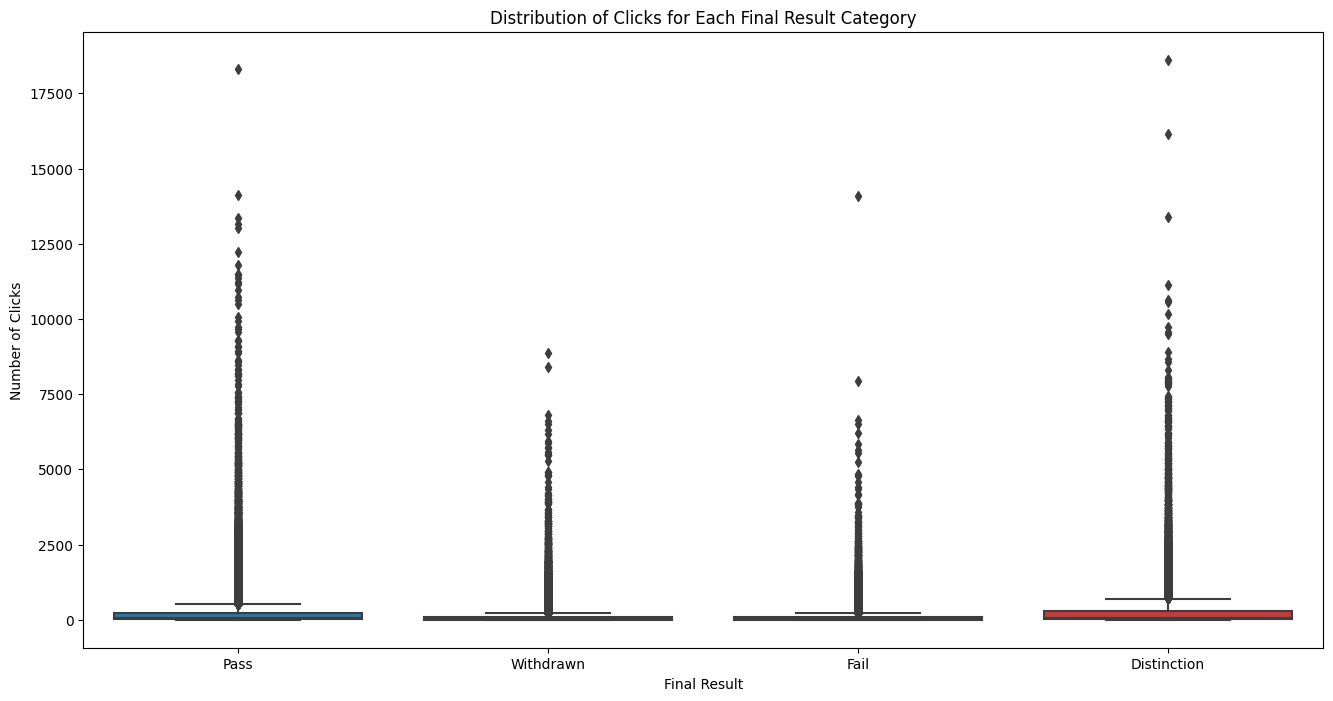

In [ ]:

# Load the datasets
student_info_df = pd.read_csv('studentInfo.csv')
moodle_df = pd.read_csv('moodle.csv', error_bad_lines=False)
interact_df = pd.read_csv('studentMoodleInteract.csv', error_bad_lines=False)

# Merge datasets to combine student information, course performance, and interaction data
merged_df = interact_df.merge(moodle_df[['id_site', 'activity_type']], on='id_site', how='left')
merged_df = merged_df.merge(student_info_df[['id_student', 'code_module', 'code_presentation', 'final_result']], on='id_student', how='left')

print(merged_df.columns)

# Group by student, course, semester, final_result, and activity type, and calculate the total number of clicks
clicks_per_student_course_activity = merged_df.groupby(['id_student', 'code_module_x', 'code_presentation_x', 'final_result', 'activity_type'])['sum_click'].sum().reset_index()

# Create visualizations
plt.figure(figsize=(16, 8))

# Boxplot to visualize distribution of clicks for each final_result category
sns.boxplot(x='final_result', y='sum_click', data=clicks_per_student_course_activity)
plt.title('Distribution of Clicks for Each Final Result Category')
plt.xlabel('Final Result')
plt.ylabel('Number of Clicks')




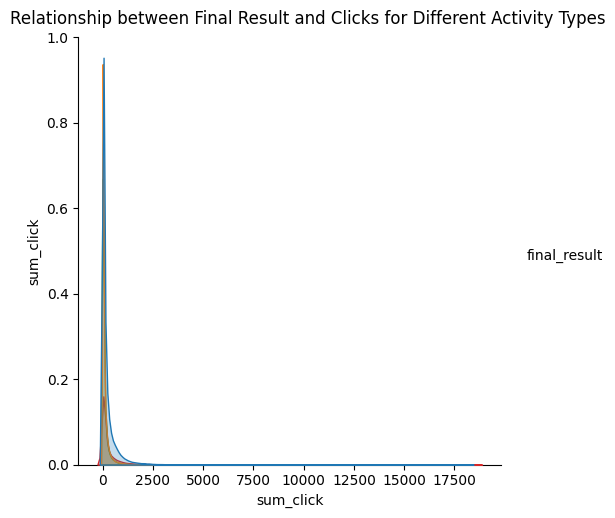

In [ ]:
# Pairplot to visualize relationships between final_result and clicks for different activity types
sns.pairplot(clicks_per_student_course_activity, hue='final_result', x_vars=['sum_click'], y_vars=['sum_click'], kind='scatter', height=5)
plt.suptitle('Relationship between Final Result and Clicks for Different Activity Types', y=1.02)

plt.show()

## 2. Predictive Modeling

In this section, you will build a machine learning model to predict students' final course outcome (`final_result` column in `studentInfo.csv`). That is, whether student is 'Pass', 'Withdrawn', 'Fail', or 'Distinction'. If you consider the number of students in some of these categories are too few, you can combine them into a new category.

### 2.1. Generate Features from Demographic Information

In Section 1.2, you explored demographic data about students and tuned some categorical variables. From these categorical variables, please generate *at least* **10** *dummy* variables to be used for predictors in the machine learning model.

In [ ]:
import pandas as pd

# Load the student information dataset
student_info_df = pd.read_csv('studentInfo.csv')

# Combine 'Withdrawn' and 'Fail' into a new category 'Not_Pass'
student_info_df['final_result'] = student_info_df['final_result'].replace({'Withdrawn': 'Not_Pass', 'Fail': 'Not_Pass'})

# Select categorical variables for generating dummy variables
categorical_features = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

# Generate dummy variables
dummy_features = pd.get_dummies(student_info_df[categorical_features], drop_first=True)

# Concatenate the dummy variables with the original dataset
student_info_df = pd.concat([student_info_df, dummy_features], axis=1)

# Display the updated dataset with dummy variables
print(student_info_df.head())


  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits  ... imd_band_30-40% imd_band_40-50%  imd_band_50-60%  \
0              240  ...               0               0   

### 2.2. Generate/Select Features from Click Data

In Section 1.5, you have already created some features from students' click behaviour. You can use all of them here as additional predictors.

Additionally, you should create *at least* **3** features indicating the engagement level of students at different course components. Some example features are provided below :

* a dummy variable that indicates if students clicked at least three types of course components or not,
* each student's average number of clicks across all components per a single course and semester,
* a dummy variable indicating if students clicked all types of course components.

There is no limit in the type and number of additional feature you can generate from the click data.

### 2.3. Training and Testing the Model

As the last activity in this project, you are expected to train and test a logistic regression model for predicting students' final course status. You should use 10-fold cross-validation.

Interpret the results based on confusion matrix and AUC scores. In your interpretation, please also mention the features with high predictive power and those with low predictive power.

Please note that the achieving low/high accuracy in the predictions has no importance for your grade.